In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [19]:
file1=pd.read_csv ('/content/drive/MyDrive/Mall_Customers.csv')
data



,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [11]:
mall_data=file1

In [13]:
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


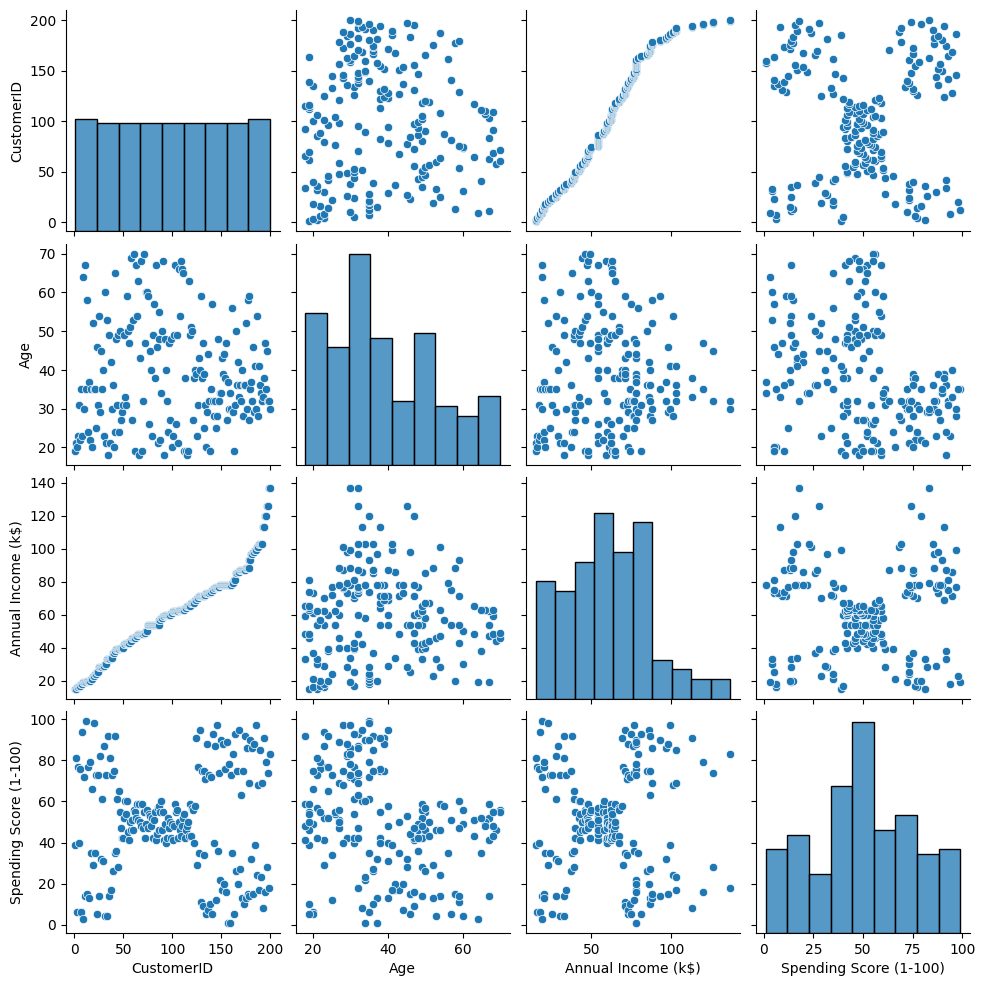

In [14]:
sns.pairplot(data=mall_data)

In [18]:
data=mall_data.drop(['CustomerID','Gender','Age'],axis=1)
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [17]:
data.info

<bound method DataFrame.info of      Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]>

In [20]:
scaler=StandardScaler()
scaler.fit(data)

StandardScaler()

In [22]:
find_out=[]
for i in range (1,11):
  clustering=KMeans(n_clusters=i,init='k-means++')
  clustering.fit(data)
  find_out.append(clustering.inertia_)
find_out


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25028.020475269415,
 21818.114588452176,
 19664.68519600554]

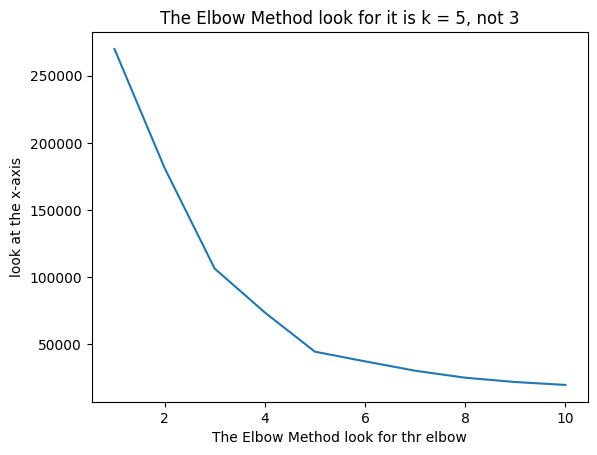

In [23]:
plt.plot(range(1,11),find_out)
plt.title('The Elbow Method look for it is k = 5, not 3')
plt.xlabel('The Elbow Method look for thr elbow')
plt.ylabel('look at the x-axis')
plt.show()


In [24]:
model=KMeans(init='k-means++', n_clusters=5, random_state=0)
cluster = model.fit_predict(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
model.cluster_centers_[:]

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

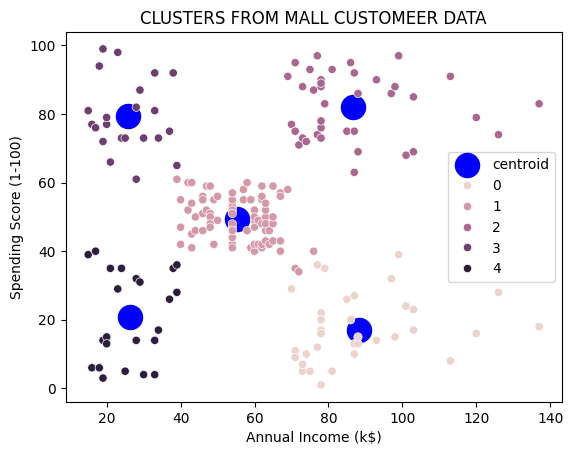

In [45]:
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='blue',label='centroid')
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue = cluster)
plt.title('CLUSTERS FROM MALL CUSTOMEER DATA')
plt.show()